In [330]:
import pandas as pd
import numpy as np

In [331]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evlauation
6. Improvement
7. Website
8. Deploy

## 1. Data Cleaning

In [332]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [333]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [334]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [335]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['target'] = label.fit_transform(df['target'])
df # 0=ham, 1=spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [336]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [337]:
# check for duplicates value
df.duplicated().sum()

403

In [338]:
df = df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [339]:
df.duplicated().sum()

0

## 2.EDA

In [340]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

[]

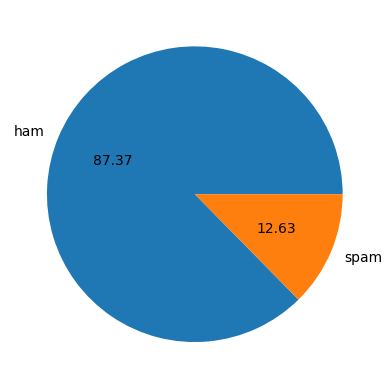

In [341]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), autopct='%0.2f', labels=['ham', 'spam'])
plt.plot()

In [342]:
# data is imbalanced

In [343]:
import nltk

In [344]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\HP/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [345]:
df['num_characters'] = df['text'].apply(len) # give length of message


C:\Users\HP\AppData\Local\Temp\ipykernel_14788\4159580252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len) # give length of message


In [346]:
# nltk.word_tokenize() separate paragraph word by word
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_14788\657486066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [347]:
# nltk.sent_tokenize() separate paragraph in line by line
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_14788\4206008179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [348]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [349]:
df[['num_words', 'num_sentences', 'num_characters']].describe()

,num_words,num_sentences,num_characters
count,5169.000000,5169.000000,5169.000000
mean,18.455794,1.965564,78.977945
std,13.324758,1.448541,58.236293
min,1.000000,1.000000,2.000000
25%,9.000000,1.000000,36.000000
50%,15.000000,1.000000,60.000000
75%,26.000000,2.000000,117.000000
max,220.000000,38.000000,910.000000


In [350]:
df1 = df[df['target']==0]
df2 = df[df['target']==1]

In [351]:
df1[['num_words', 'num_sentences', 'num_characters']].describe()

,num_words,num_sentences,num_characters
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [352]:
df2[['num_words', 'num_sentences', 'num_characters']].describe()

,num_words,num_sentences,num_characters
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


<Axes: xlabel='num_characters', ylabel='Count'>

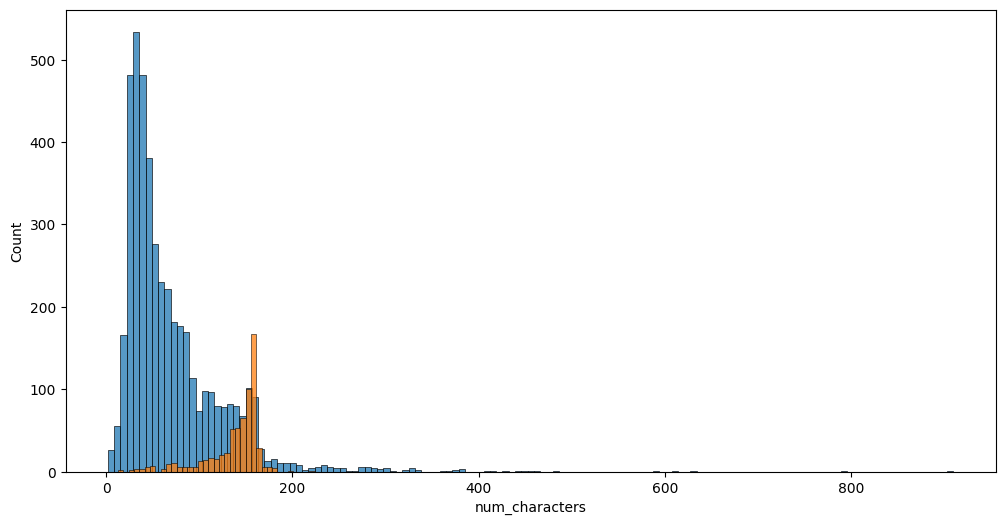

In [353]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df1['num_characters'])
sns.histplot(df2['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

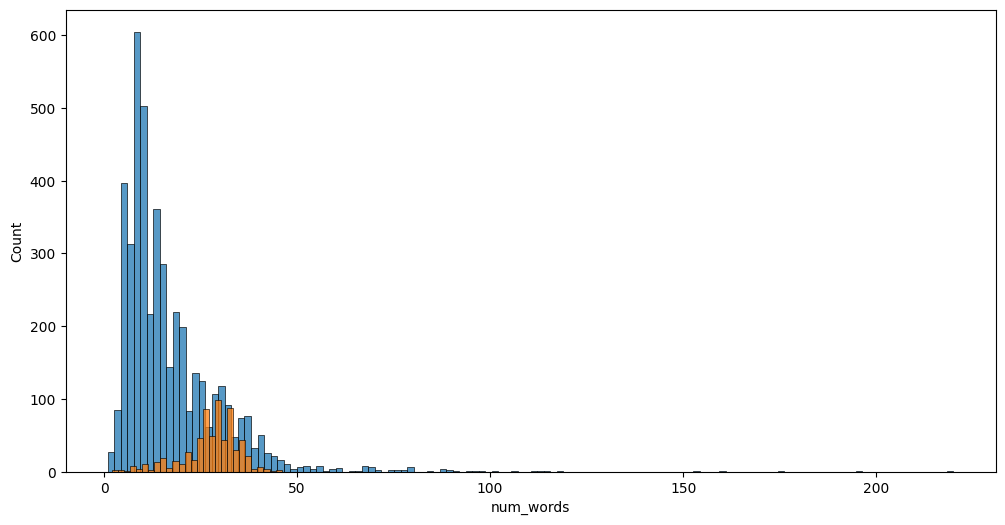

In [354]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df1['num_words'])
sns.histplot(df2['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

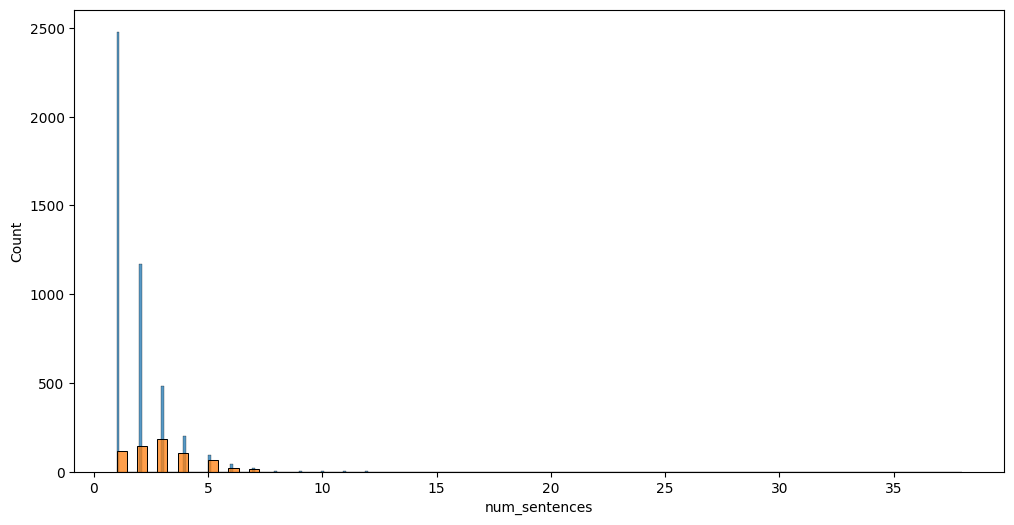

In [355]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df1['num_sentences'])
sns.histplot(df2['num_sentences'])

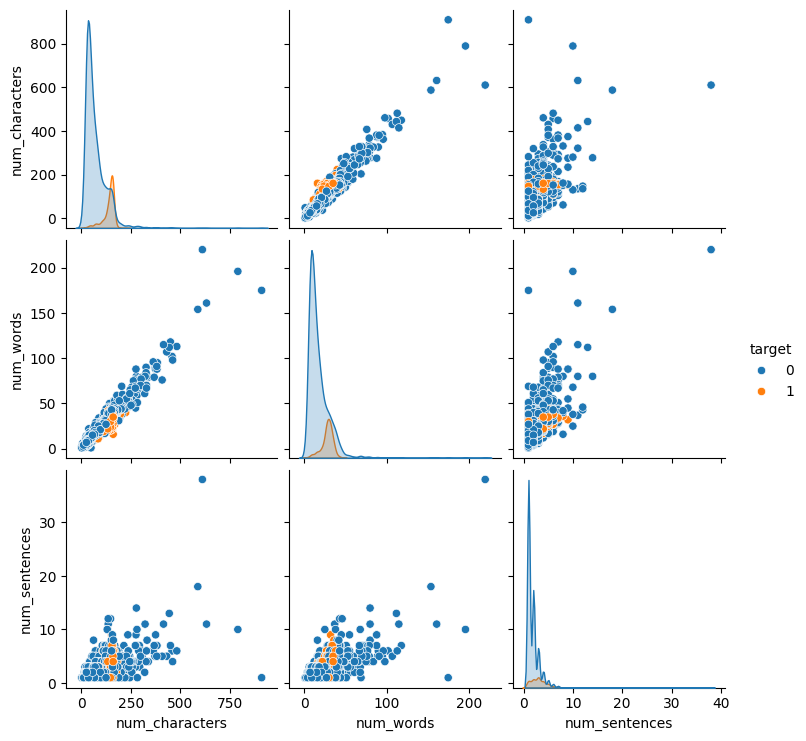

In [356]:
sns.pairplot(df, hue='target')

In [357]:
df[['target', 'num_words', 'num_characters', 'num_sentences']].corr()

,target,num_words,num_characters,num_sentences
target,1.000000,0.262912,0.384717,0.263939
num_words,0.262912,1.000000,0.965760,0.679971
num_characters,0.384717,0.965760,1.000000,0.624139
num_sentences,0.263939,0.679971,0.624139,1.000000


<Axes: >

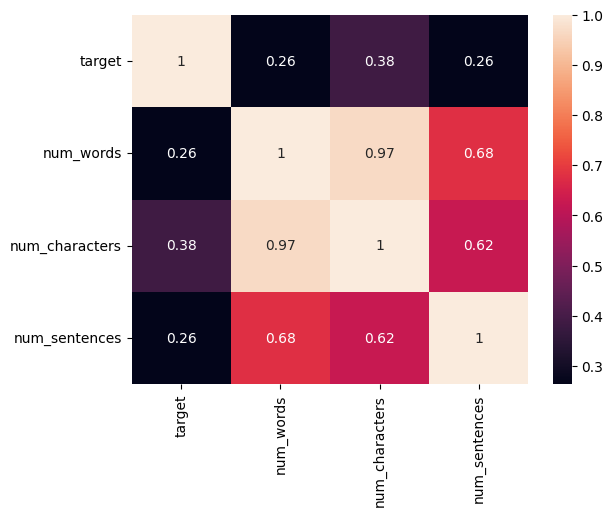

In [358]:
sns.heatmap(df[['target', 'num_words', 'num_characters', 'num_sentences']].corr(), annot=True)

## 3.Data Prepocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [359]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [360]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [361]:
# Convert all words to root word
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loveing')

'love'

In [362]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) 
    text = y[:] 
    y.clear() 
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y) # to give string as output

In [363]:
transform_text("I loved 20% Youtube lectures on Machine Learning, How about you?")

'love 20 youtub lectur machin learn'

In [364]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [365]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\HP\AppData\Local\Temp\ipykernel_14788\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [366]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
3145,0,\SHIT BABE.. THASA BIT MESSED UP.YEH,36,7,1,babe thasa bit mess
3010,0,"Hm good morning, headache anyone? :-)",37,10,2,hm good morn headach anyon
5372,0,"Ok., is any problem to u frm him? Wats matter?",46,13,2,problem u frm wat matter
3836,0,Early bird! Any purchases yet?,30,7,2,earli bird purchas yet
691,0,Sorry to trouble u again. Can buy 4d for my da...,109,32,5,sorri troubl u buy 4d dad 1405 1680 2 big 1 sm...


In [367]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


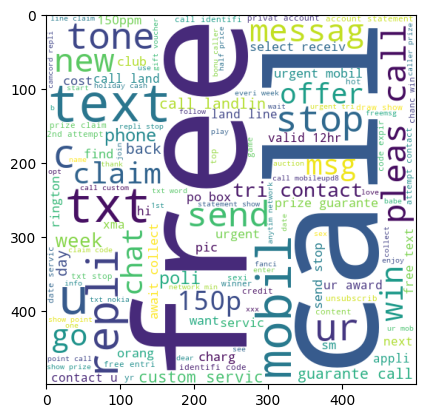

In [368]:
spam_word_cloud = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

# give words as heihlight which are mostly used in spam messages
plt.imshow(spam_word_cloud)

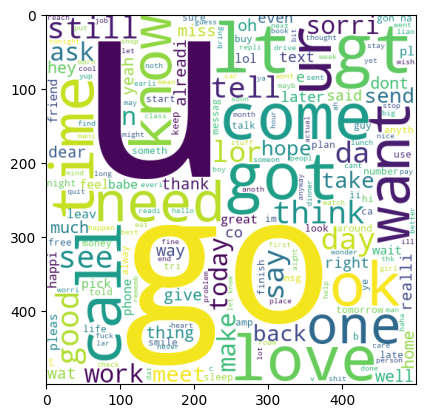

In [369]:
ham_word_cloud = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

# give words as heihlight which are mostly used in ham messages
plt.imshow(ham_word_cloud)

In [370]:
spam_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [371]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [372]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

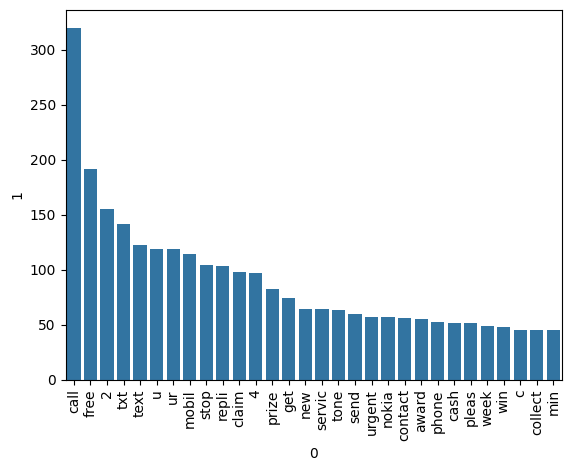

In [373]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [374]:
ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

In [375]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

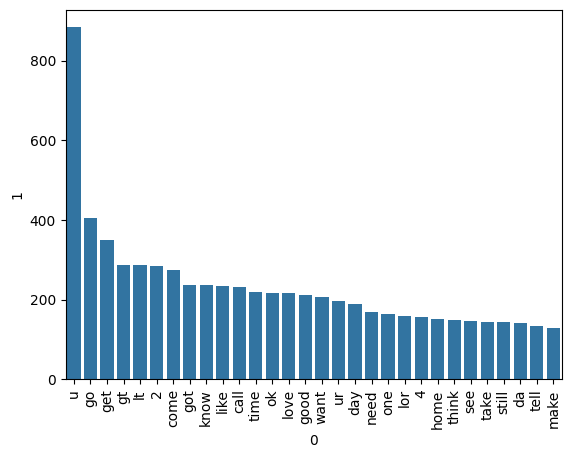

In [376]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [377]:
x = df['transformed_text']
y = df['target']
x, y

(0       go jurong point crazi avail bugi n great world...
 1                                   ok lar joke wif u oni
 2       free entri 2 wkli comp win fa cup final tkt 21...
 3                     u dun say earli hor u c alreadi say
 4                    nah think goe usf live around though
                               ...                        
 5567    2nd time tri 2 contact u pound prize 2 claim e...
 5568                                b go esplanad fr home
 5569                                    piti mood suggest
 5570    guy bitch act like interest buy someth els nex...
 5571                                       rofl true name
 Name: transformed_text, Length: 5169, dtype: object,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5567    1
 5568    0
 5569    0
 5570    0
 5571    0
 Name: target, Length: 5169, dtype: int32)

In [378]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = TfidfVectorizer()
x = cv.fit_transform(x).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [379]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [380]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score

In [381]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lrc = LogisticRegression(penalty='l1', solver='liblinear')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [382]:
model = {
    'SVC':svc,
    'KNC':knc,
    'GNB':gnb,
    'MNB':mnb,
    'BNB':mnb,
    'LRC':lrc, 
    'DTC':dtc,
    'RFC':rfc,
    'ABC':abc,
    'BC':bc,
    'ETC':etc,
    'GBC':gbc,
    'XGB':xgb
}

In [383]:
def train_classifier(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [384]:
accuracy_scores = []
precision_scores = []

for name, model_name in model.items():
    
    current_accuracy, current_precision = train_classifier(model_name, x_train, x_test, y_train, y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
     

In [385]:
performance = pd.DataFrame({'Algorithm':model.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})
performance.sort_values('Precision', ascending=False)

,Algorithm,Accuracy,Precision
1,KNC,0.900387,1.000000
3,MNB,0.959381,1.000000
4,BNB,0.959381,1.000000
7,RFC,0.971954,1.000000
10,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
5,LRC,0.951644,0.940000
12,XGB,0.970019,0.934959
11,GBC,0.952611,0.923810
9,BC,0.958414,0.862595


# After Update

In [386]:
x = df['transformed_text']
y = df['target']
x, y

(0       go jurong point crazi avail bugi n great world...
 1                                   ok lar joke wif u oni
 2       free entri 2 wkli comp win fa cup final tkt 21...
 3                     u dun say earli hor u c alreadi say
 4                    nah think goe usf live around though
                               ...                        
 5567    2nd time tri 2 contact u pound prize 2 claim e...
 5568                                b go esplanad fr home
 5569                                    piti mood suggest
 5570    guy bitch act like interest buy someth els nex...
 5571                                       rofl true name
 Name: transformed_text, Length: 5169, dtype: object,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5567    1
 5568    0
 5569    0
 5570    0
 5571    0
 Name: target, Length: 5169, dtype: int32)

In [396]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = TfidfVectorizer(max_features=3000)
x = cv.fit_transform(x).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [405]:
var = pd.DataFrame({'helper':x[20]})
var.describe()

,helper
count,3000.000000
mean,0.000573
std,0.018251
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.630816


In [388]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [389]:
def train_classifier(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [390]:
accuracy_scores_after_update = []
precision_scores_after_update = []

for name, model_name in model.items():
    
    current_accuracy, current_precision = train_classifier(model_name, x_train, x_test, y_train, y_test)
    accuracy_scores_after_update.append(current_accuracy)
    precision_scores_after_update.append(current_precision)

In [391]:
performance_after_update = pd.DataFrame({'Algorithm':model.keys(), 'Accuracy_after_update':accuracy_scores_after_update, 'Precision_after_update':precision_scores_after_update})
performance_after_update.sort_values('Precision_after_update', ascending=False)

,Algorithm,Accuracy_after_update,Precision_after_update
1,KNC,0.905222,1.000000
3,MNB,0.970986,1.000000
4,BNB,0.970986,1.000000
7,RFC,0.975822,0.982906
0,SVC,0.975822,0.974790
10,ETC,0.974855,0.974576
5,LRC,0.958414,0.970297
12,XGB,0.967118,0.933333
11,GBC,0.946809,0.919192
9,BC,0.958414,0.868217


In [392]:
final_performance = performance.merge(performance_after_update, on='Algorithm')

In [393]:
final_performance

,Algorithm,Accuracy,Precision,Accuracy_after_update,Precision_after_update
0,SVC,0.972921,0.974138,0.975822,0.974790
1,KNC,0.900387,1.000000,0.905222,1.000000
2,GNB,0.876209,0.523148,0.869439,0.506849
3,MNB,0.959381,1.000000,0.970986,1.000000
4,BNB,0.959381,1.000000,0.970986,1.000000
5,LRC,0.951644,0.940000,0.958414,0.970297
6,DTC,0.935203,0.838095,0.929400,0.828283
7,RFC,0.971954,1.000000,0.975822,0.982906
8,ABC,0.924565,0.840909,0.924565,0.848837
9,BC,0.958414,0.862595,0.958414,0.868217


### For Final model



In [419]:
x = df['transformed_text']
y = df['target']
x, y

(0       go jurong point crazi avail bugi n great world...
 1                                   ok lar joke wif u oni
 2       free entri 2 wkli comp win fa cup final tkt 21...
 3                     u dun say earli hor u c alreadi say
 4                    nah think goe usf live around though
                               ...                        
 5567    2nd time tri 2 contact u pound prize 2 claim e...
 5568                                b go esplanad fr home
 5569                                    piti mood suggest
 5570    guy bitch act like interest buy someth els nex...
 5571                                       rofl true name
 Name: transformed_text, Length: 5169, dtype: object,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5567    1
 5568    0
 5569    0
 5570    0
 5571    0
 Name: target, Length: 5169, dtype: int32)

In [420]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(x).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [421]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [422]:
from sklearn.naive_bayes import MultinomialNB

final_model = MultinomialNB()
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9709864603481625
1.0


In [423]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(final_model, open('model.pkl', 'wb'))